# ***Seabornで描く様々なグラフ、その描き方***
---

## ヒストグラム
---
### distplot()だのdisplot()のdisはdistributionっぽい（覚え方）
### histplot()はそのまま、ヒストグラム

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
sns.set()

# 散布図：scatter plot系
---

## `sns.scatterplot(x, y, df)` 散布図；scatter plot

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

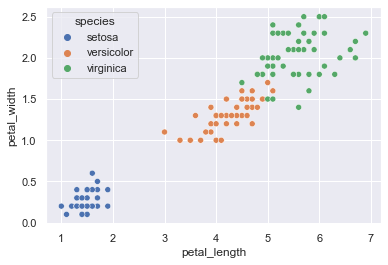

In [9]:
sns.scatterplot(x=df['petal_length'], y=df['petal_width'],data=df, hue='species')

## `sns.jointplot(x, y, data)` 散布図＋ヒストグラムで二変数を可視化

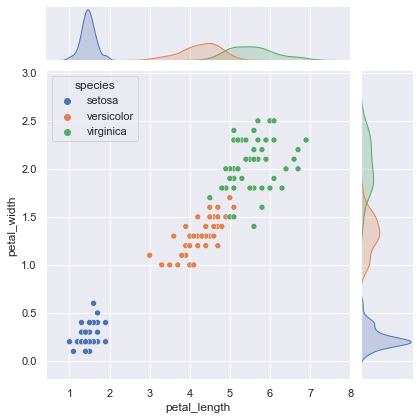

In [10]:
sns.jointplot(x=df['petal_length'], y=df['petal_width'],data=df, hue='species')

## `sns.pairplot(df)`散布図行列で全体像を描く。
- デフォルトでは量的データを全ての組み合わせでプロット
- 各データのヒストグラムも生成

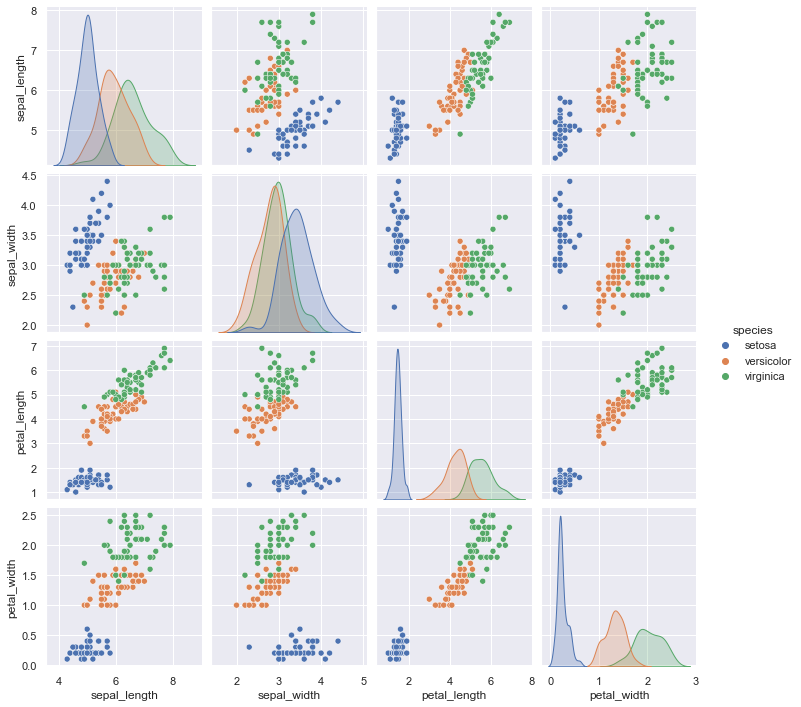

In [5]:
sns.pairplot(df, hue='species')

---
# 折れ線グラフ：line plot系
---

In [13]:
df2 = sns.load_dataset('flights')
df2.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


### 1月のデータだけ抜いてきてプロットする（1点/年）場合、単純な線になる

<AxesSubplot:xlabel='year', ylabel='passengers'>

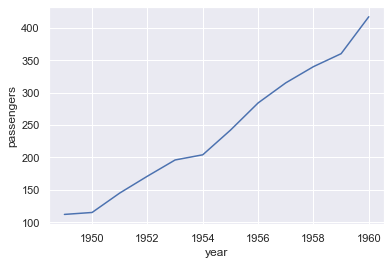

In [16]:
sns.lineplot(x='year', y='passengers', data=df2[df2['month']=='Jan'])

### 全ての月のデータを使う（12点/年）の場合、デフォルトでブートストラップ信頼区間 (信頼係数 95%)が表示

<AxesSubplot:xlabel='year', ylabel='passengers'>

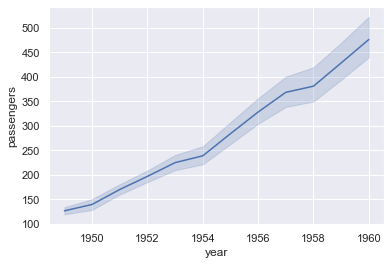

In [14]:
sns.lineplot(x='year', y='passengers', data=df2)

### 12本を一つのグラフに引く場合

In [20]:
df2['month'].dtype

CategoricalDtype(categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
                  'Sep', 'Oct', 'Nov', 'Dec'],
                 ordered=False)

In [19]:
sns.lineplot(x='yaer', y='passengers', hue='month', date=df2)

ValueError: Could not interpret value `month` for parameter `hue`

### `sns.relplot(x, y, col, data, kind='line, col_wrap` 
### 12ヶ月それぞれで線を引いて並べたい場合

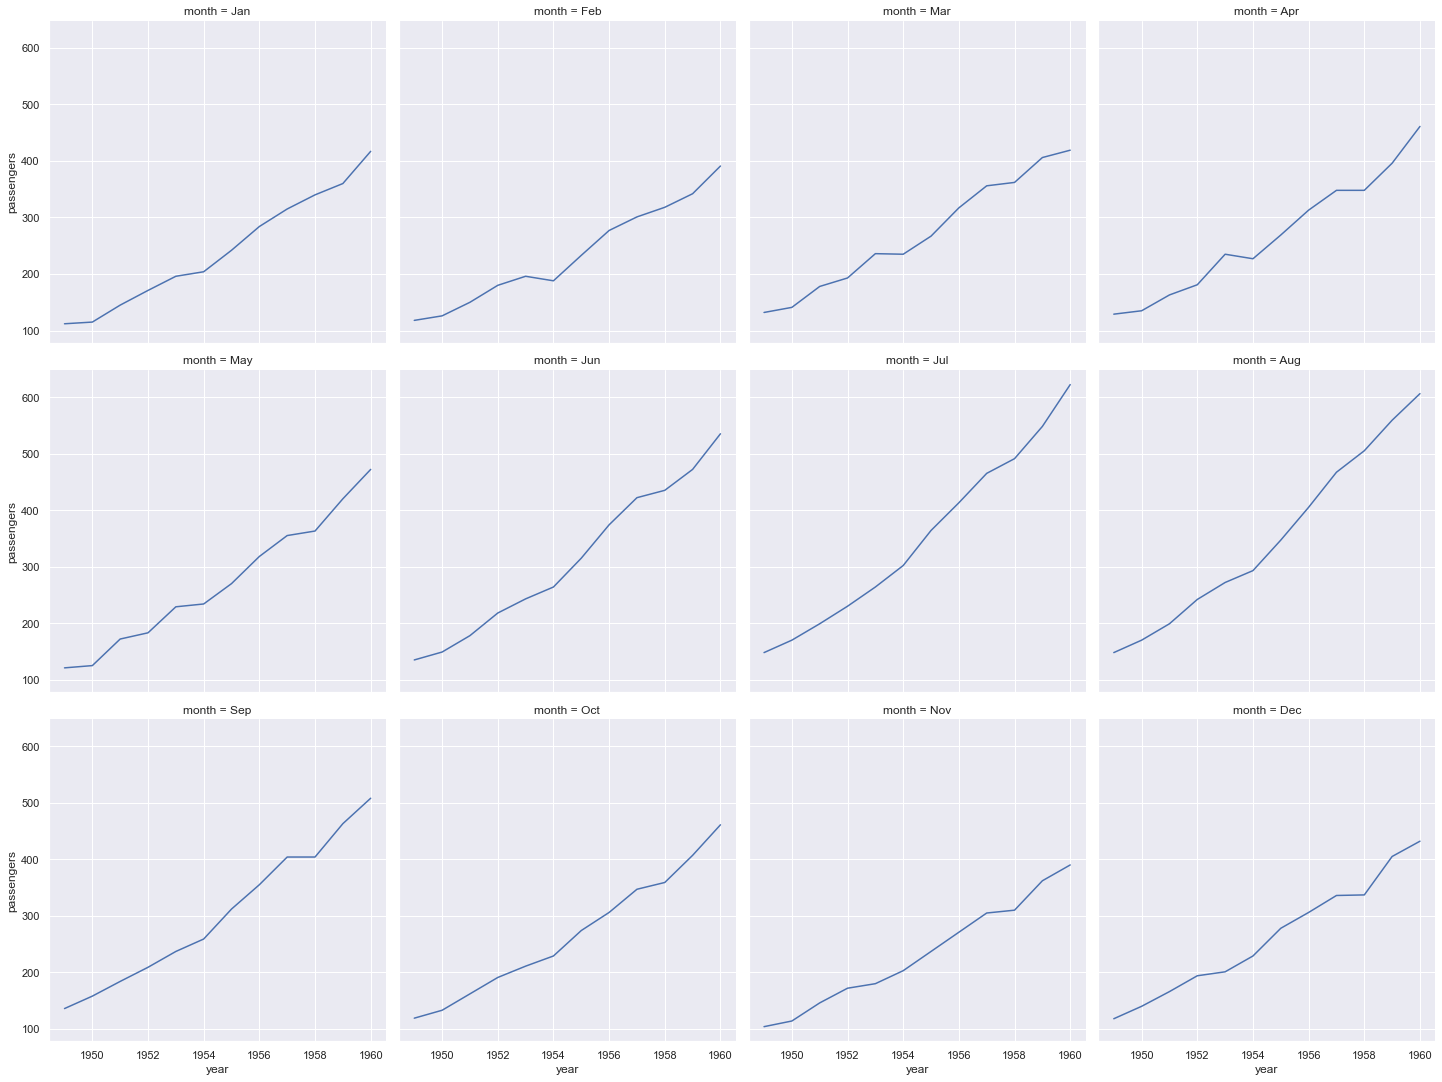

In [18]:
sns.relplot( x='year', y='passengers', col='month', data=df2, kind='line',col_wrap=4)

In [22]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Categorical Plot系
- `sns.catplot()`で書くやり方と、`sns.hogeplot()`で書くやり方があるが、基本`catplot()`でいい気がする。
- `catplot()`だと`hue`以外に`col`引数でも分離できて便利
- `catplot()`だと`ax`引数が無い(figure-level functionらしい）。その代わり上記のようにfigサイズが状況に応じて変わったりする
- subplotsで並べたい場合はcatplot()ではなく直接指定の関数を使う
- `catplot()`は昔`factorplot()`という関数で、今も残っているが使わない方がいい。

## strip plot(ストリップチャート）
- 正直見づらいからあまり使わないと思われる
- `sns.stripplot(x,y,data)
- `sns.catplot(x,y,data,kind='strip')

<AxesSubplot:xlabel='pclass', ylabel='age'>

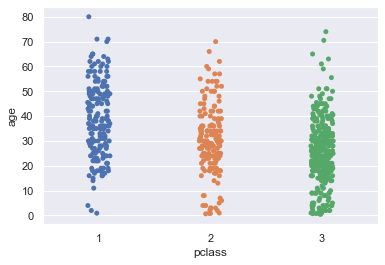

In [27]:
sns.stripplot(data=titanic, x='pclass', y='age')

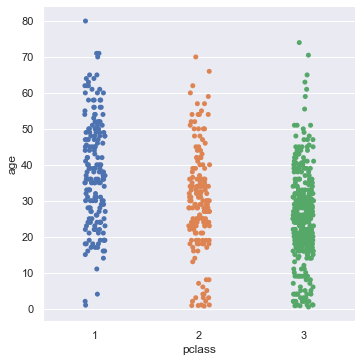

In [25]:
sns.catplot(data=titanic, x='pclass', y='age', kind='strip')

/Users/yuya/.local/share/virtualenvs/test36--SgIQ7cC/lib/python3.6/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


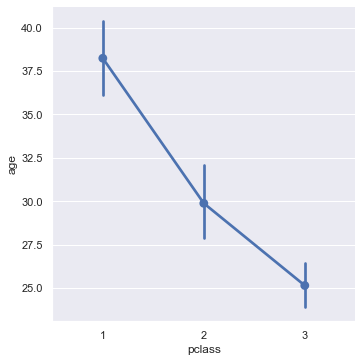

In [50]:
sns.factorplot(data=titanic, x='pclass', y='age')

## swarm plot(スウォームチャート）
- たまに見る。微調整しないとうまく収まったプロットをしてくれないっぽい
- `sns.swarmplot(data, x, y)`
- `sns.catplot(data, x, y, kind='swarm')`

/Users/yuya/.local/share/virtualenvs/test36--SgIQ7cC/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 15.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='pclass', ylabel='age'>

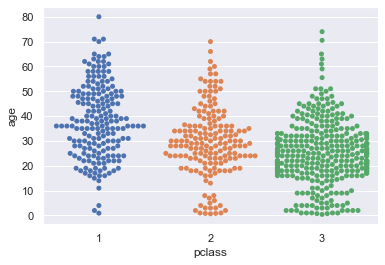

In [28]:
sns.swarmplot(data=titanic, x='pclass', y='age')

/Users/yuya/.local/share/virtualenvs/test36--SgIQ7cC/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


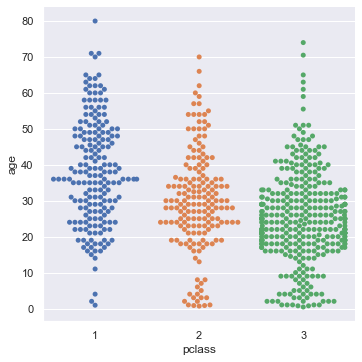

In [29]:
sns.catplot(data=titanic, x='pclass', y='age', kind='swarm')

## box plot(箱髭図）
- 第二、第三四分位で箱を書き、最大値と最小値までバーを出す
- ただし第二、第三四分位から1.5IQRより外は外れ値表示（変えられる）
- `sns.boxplot(x,y,data)`
- `sns.cotplot(x,y,data,kind='box')`

<AxesSubplot:xlabel='pclass', ylabel='age'>

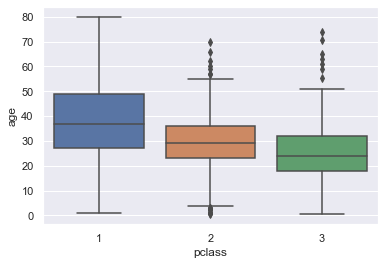

In [30]:
sns.boxplot(data=titanic, x='pclass', y='age')

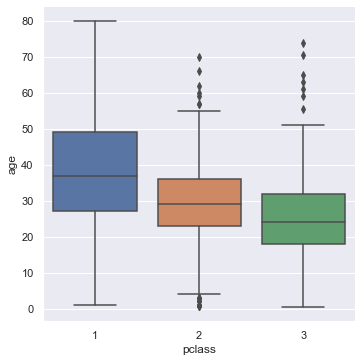

In [31]:
sns.catplot(data=titanic, x='pclass', y='age', kind='box')

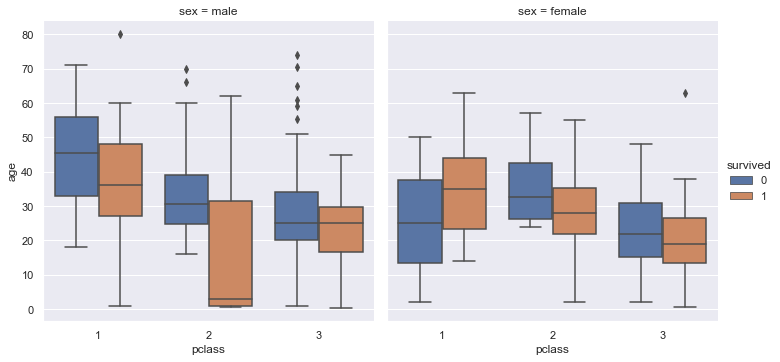

In [32]:
sns.catplot(data=titanic, kind='box', x='pclass', y='age', hue='survived', col='sex')

## violin plot (バイオリン図）
- 箱髭図とスウォームチャートの合体版
- 中に箱髭図もどきが入っていて、外側はswarmを滑らかに近似した線が引かれる

<AxesSubplot:xlabel='pclass', ylabel='age'>

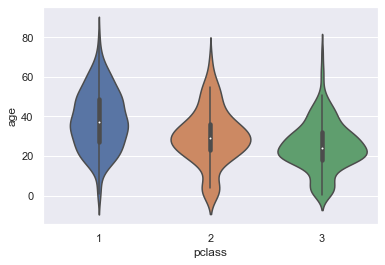

In [34]:
sns.violinplot(data=titanic, x='pclass', y='age')

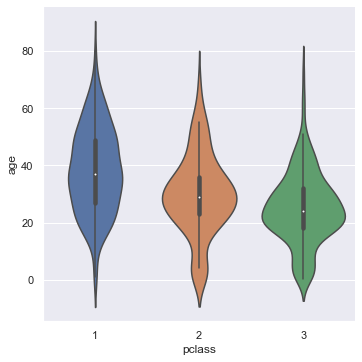

In [36]:
sns.catplot(data=titanic, x='pclass', y='age', kind='violin')

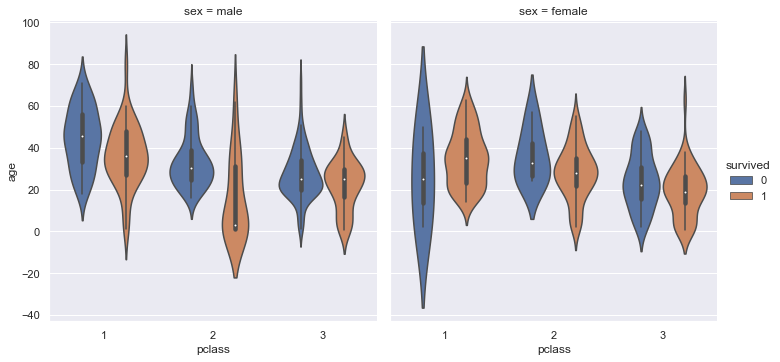

In [44]:
sns.catplot(data=titanic, x='pclass', y='age', kind='violin', hue='survived',col='sex')

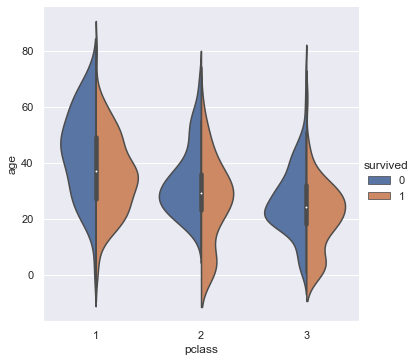

In [43]:
sns.catplot(data=titanic, x='pclass', y='age', kind='violin', hue='survived', split=True)

## boxen plot (letter value plot)
- 箱髭図のバー部分の情報が落ちすぎている場合に使用。

<AxesSubplot:xlabel='pclass', ylabel='age'>

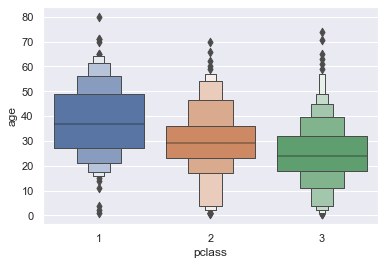

In [45]:
sns.boxenplot(data=titanic, x='pclass', y='age')

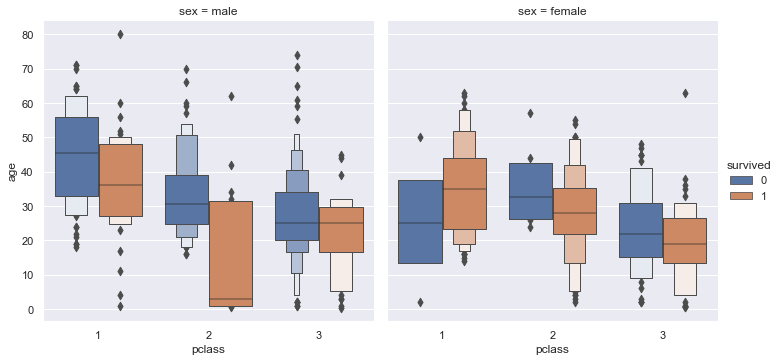

In [48]:
sns.catplot(data=titanic, x='pclass', y='age', kind='boxen', hue='survived', col='sex')

## point plot
- **折れ線ではなく**x軸はカテゴリなので注意
- 平均と信頼区間をプロットし、並んだカテゴリをつなぐ
- あまり使う気がしない

<AxesSubplot:xlabel='pclass', ylabel='age'>

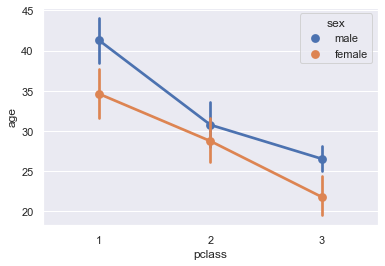

In [51]:
sns.pointplot(data=titanic, x='pclass', y='age', hue='sex')

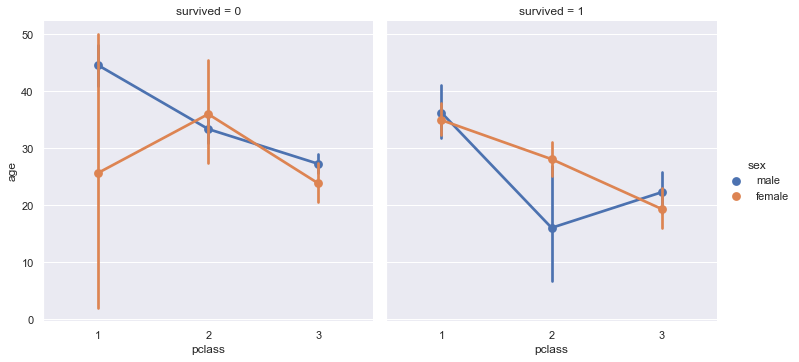

In [54]:
sns.catplot(data=titanic, x='pclass', y='age', hue='sex', col='survived', kind='point')

## barplot (棒グラフ）
- 平均を高さとするバー
- ブートストラップ信頼区間

<AxesSubplot:xlabel='pclass', ylabel='age'>

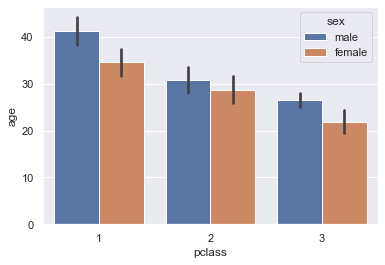

In [55]:
sns.barplot(data=titanic, x='pclass', y='age', hue='sex')

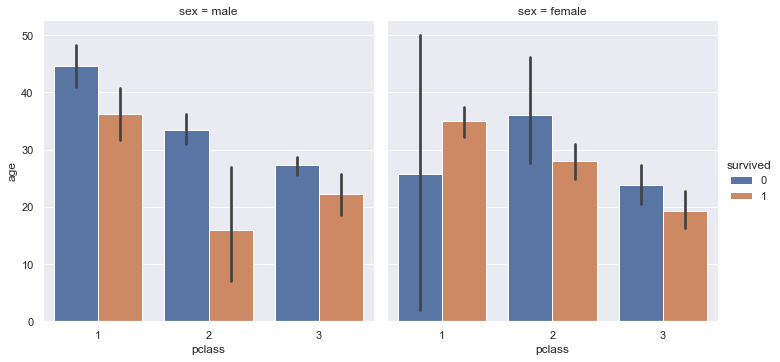

In [57]:
sns.catplot(kind='bar', data=titanic, x='pclass', y='age', hue='survived', col='sex')

## count plot
- カテゴリに対してデータ数をカウントする

<AxesSubplot:xlabel='pclass', ylabel='count'>

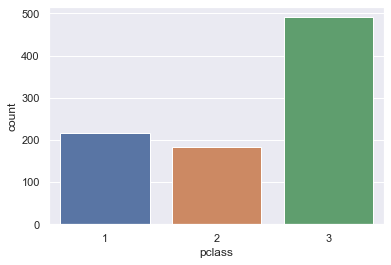

In [58]:
sns.countplot(data=titanic, x='pclass')

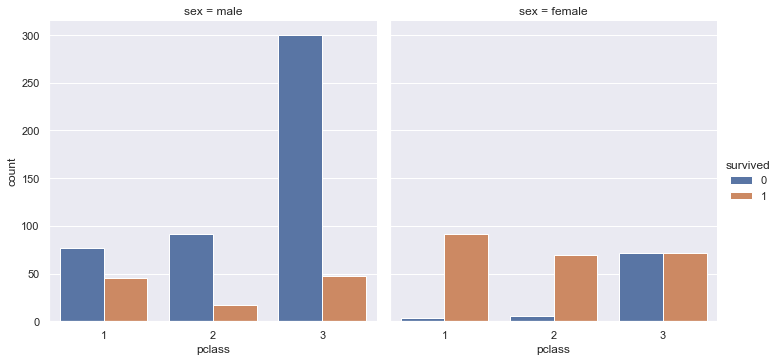

In [62]:
sns.catplot(kind='count', data=titanic, x='pclass', hue='survived', col='sex')

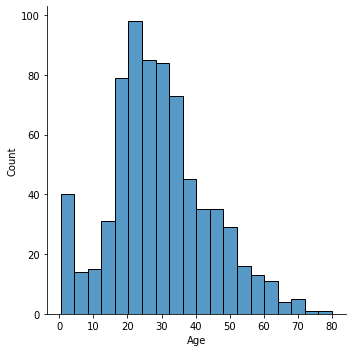

In [5]:
# distplotではなくdisplotにすると普通の見やすいヒストグラム
sns.displot(df['Age'])
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Count'>

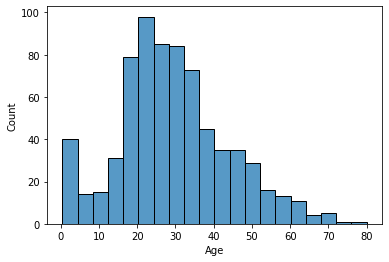

In [6]:
# histplot(): displotとの違いがグラフ幅くらいしかない
sns.histplot(df['Age'])